# Kernel PCA

In [1]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np

In [17]:
def rbf_kpca(X, gamma, n_components):
    # distancias cuadradas
    sq_dists = pdist(X, 'sqeuclidean')
    # print(sq_dists.shape)

    # convertir sq_dists en una matriz
    mat_sq_dists = squareform(sq_dists)

    # matriz de nucleos
    K = np.exp(-gamma * mat_sq_dists)

    # centrar X
    N = K.shape[0]
    one_n = np.ones((N,N)) / N 
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # obtener eigenpares; eigh los devuelve ordenados ASC
    eigenvals, eigenvecs = eigh(K)

    # invertir su orden
    eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]

    # elegir los primeros K 
    alphas = np.column_stack([eigenvecs[:, i] for i in range(n_components)])
    lambdas = np.column_stack([eigenvals[i] for i in range(n_components)])

    return alphas, lambdas


In [3]:
import matplotlib.pyplot as plt

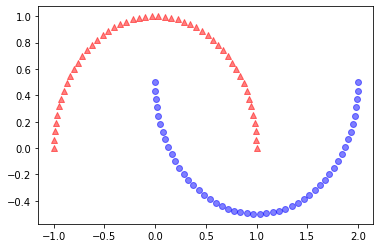

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

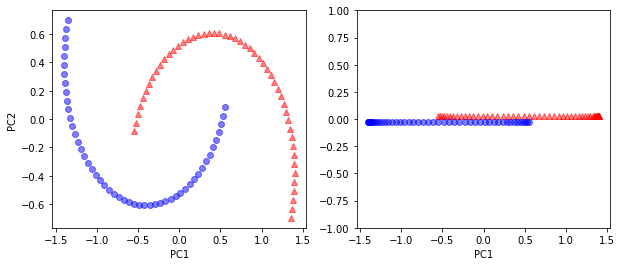

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].scatter(X_pca[y==0,0], X_pca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_pca[y==1,0], X_pca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_pca[y==0,0], np.zeros((50, 1))+0.03, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca[y==1,0], np.zeros((50, 1))-0.03, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1, 1])
plt.show()

# Estos conjuntos no son separables linealmente

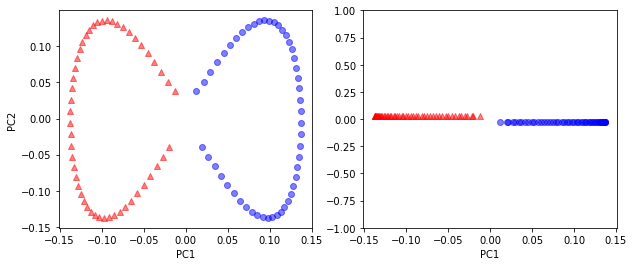

In [18]:
X_kpca, lambdas = rbf_kpca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50, 1))+0.03, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50, 1))-0.03, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1, 1])
plt.show()

# Estos conjuntos ya son separables linealmente

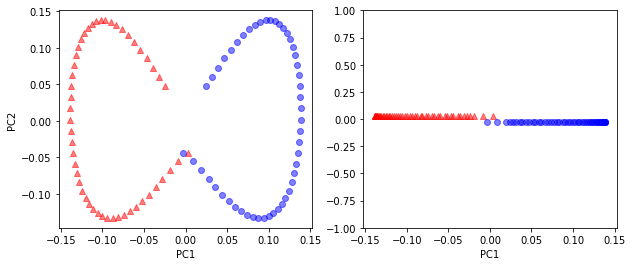

In [20]:
X_kpca, lambdas = rbf_kpca(X, gamma=10, n_components=2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50, 1))+0.03, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50, 1))-0.03, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1, 1])
plt.show()

# Estos conjuntos ya son separables linealmente

In [23]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

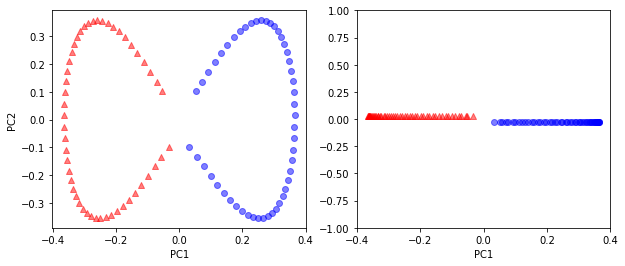

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50, 1))+0.03, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50, 1))-0.03, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1, 1])
plt.show()

# Estos conjuntos ya son separables linealmente